# Numerical Recipes Workshop 8

For the week of 15 November to 19 November, 2021

**Please submit your notebook via Noteable by 6:00pm GMT on Friday, 19 November. Don't forget to clear the output first.**

### Learning Objectives
- demystifying discrete Fourier transforms
- applications of FFTs
    - filtering
    - convolution

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Discrete Fourier Transforms

When calculating Fourier transforms numerically, we are not dealing with continuous functions. Instead, we are dealing with a signal that has been measured a finite number of times. For this reason, the transforms we are calculating here are known as Discrete Fourier Transforms, i.e., the transformation of a set of points in real space into a set of points in Fourier space.

Consider a signal measured for a time interval from t=0 to `tmax` at a sampling rate of `tres` per unit time, resulting in a signal of `N = tmax * tres` samples. The time interval has arbitrary time units, e.g., seconds, days, years, etc. The sampling rate has units of the inverse time interval units, e.g., $s^{-1}$ if `tmax` is in $s$.

The [numpy.fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) module contains functionality for calculating discrete fourier transforms using the Fast Fourier Transform (FFT) method.

### What does a DFT give us?

For a signal, $y$, containing $N$ points, a regular discrete Fourier transform will return an array of $N$ points containing the Fourier coefficients, $c_{k}$, where

$
\begin{align}
\large
c_{k} = \sum_{n=0}^{N-1} y_{n} \exp \left(-i \frac{2 \pi k n}{N}\right)
\end{align}
$

In the above, $y_{n}$, are the individual signal points. The $c_k$ values will be complex numbers.

Let's start by creating a signal consisting of Gaussian white noise for 1000 points. Compute its DFT with the [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) function and verify that it has the same number of points as the original signal.

In [3]:
y = np.random.normal(loc=0, scale=1, size=1000)
ck = np.fft.fft(y)
# YOUR CODE HERE
len(ck)==len(y)

True

The [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) function will perform an FFT of a signal containing real and imaginary components. In reality, we almost always deal with real inputs.

If the signal is entirely real, then the second half of the Fourier coefficients will be a mirror of the first half, starting at $k=1$. Well, not exactly a mirror, but they will be the complex conjugate of the first half. In other words, $c_1$ is the complex conjugate of $c_{N-1}$. The first value ($c_0$) is the simply the sum of all $y_n$ points. If $N$ is even, there will be one other un-mirrored value, $c_{N/2}$.

Let's verify this by first plotting the real components of the `ck` array we created above. Then plot the complex components. After that, confirm numerically that the $c_{r}$ (for $r$ = 1...N/2) is equal to the complex conjugate of $c_{N-r}$. Also confirm that $c_0$ is indeed the sum of the original signal.

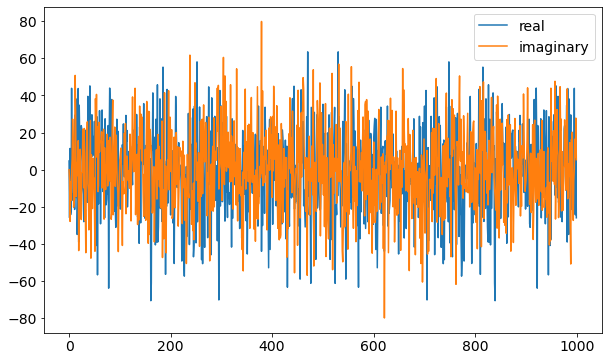

In [4]:
# YOUR CODE HERE
plt.plot(np.real(ck),label='real')
plt.plot(np.imag(ck),label='imaginary')
plt.legend()

In [5]:
N =1000
print(ck[1])
print(np.conj(ck[N-1]))

(6.511317817864548-20.97315982411752j)
(6.511317817864544-20.973159824117527j)


In [6]:
N = 1000
for r in range(1,int(N/2)):
    print(np.isclose(ck[r],np.conj(ck[N-r]),rtol=1e-12))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [7]:
print(np.isclose(np.sum(y),ck[0]))

True


Because of the above fact about DFTs on real signals, we only ever need to calculate about half the Fourier coefficients. Specifically, if $N$ (the number of points in the signal) is even, we need to calculate $N/2 + 1$ terms. If $N$ is odd, then we need to calculate $(N+1)/2$ terms. We can express this value in one term in Python as `N//2+1`, where the `//` performs integer division.

The [numpy.fft.rfft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft) function will compute an FFT for a real signal, saving us half the time we would have spent. Perform another FFT of the previous signal using the `rfft` function. Then make a new signal with 1 additional sample. Verify that its FFT calculated with `rfft` has the same number of points.

In [8]:
# YOUR CODE HERE
y1 = np.random.normal(loc=0, scale=1, size=1000)
y2 = np.random.normal(loc=0, scale=1, size=1001)
ck1 = np.fft.rfft(y1)
ck2 = np.fft.rfft(y2)
len(ck1)==len(ck2)

True

### What is happening in a Discrete Fourier Transform?

Although the form of a Fourier transform of a continuous function can look intimidating, the formula for the discrete Fourier transform (given a few cells above) is quite simple. Let's implement it ourselves to confirm that this is really all that is happening.

In the cell below, finish the implementation of the function to compute the real DFT according to the formula above. Use it to compute the DFT of the signal from earlier and confirm that the values you get are the same (or very close) to what you get from `np.fft.rfft`. Remember, you only need to compute the first `N//2+1` coefficients.

$
\begin{align}
\large
c_{k} = \sum_{n=0}^{N-1} y_{n} \exp \left(-i \frac{2 \pi k n}{N}\right)
\end{align}
$


In [9]:
len(y)

1000

In [10]:
y = np.random.normal(loc=0, scale=1, size=1000)

In [11]:
def my_rdft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

In [12]:
ck = np.fft.rfft(y)

In [13]:
my_rdft(y)

array([  6.47296072+0.00000000e+00j,  10.99833386+4.29285223e+01j,
        28.86298269-2.68939103e+01j, -29.57226818+7.58356570e+00j,
        22.76071991-1.55021843e+01j,  -6.05475817-6.39734421e+00j,
        -9.35956956-2.02069101e+01j,   1.35226429-1.38218608e+01j,
        11.70669541+3.86827962e+01j,  -7.75518481-2.16604565e+01j,
        19.89617635-1.60341219e+01j,  45.98324239+2.50992290e+01j,
         4.74224307+6.32453347e+00j,  15.61290614+4.38410795e+01j,
        -6.33216574+2.39030173e+01j,   6.86670443-1.59854336e+01j,
        16.40542619+2.97668879e+01j,   3.72507668-1.24059982e+01j,
         3.76964842-9.98731230e+00j, -12.56080702-3.23568489e+00j,
        -5.26859364+9.99302341e+00j,  25.13133193-1.02081208e+01j,
       -13.63312969+9.44676924e+00j,  25.22033397-1.16803454e+01j,
         1.16440329-6.13105274e+00j, -27.09844695-4.71588896e+00j,
        44.25692544+5.07074982e+01j,  10.52755822+2.27200107e+00j,
        -9.82211533+7.59140768e+00j, -32.1383676 +3.96087384e+

### So why bother with FFTs then?

If the DFT is really only a half-dozen lines of code, then why bother with the FFT function? Try running both functions on samples of a few different sizes and time how long each function takes. If you care to, make a plot showing how each one scales with $N$ by transforming signals of a hundred points up to a few thousand. Double $N$ each time instead of increasing incrementally.

In [14]:
import time

In [15]:
# YOUR CODE HERE
N = [100,200,400,800,1600,3200]
for n in N:
    x = np.random.normal(loc=0, scale=1, size=n)
    t1 = time.time()
    ck = np.fft.rfft(x)
    t2 = time.time()
    print('N is',n)
    print('numpy fourier transform',(t2 - t1))
    t3 = time.time()
    ck = my_rdft(x)
    t4 = time.time()
    print('my fourier transform',(t4 - t3))

N is 100
numpy fourier transform 3.62396240234375e-05
my fourier transform 0.02362227439880371
N is 200
numpy fourier transform 3.743171691894531e-05
my fourier transform 0.0951223373413086
N is 400
numpy fourier transform 3.600120544433594e-05
my fourier transform 0.37277674674987793
N is 800
numpy fourier transform 3.9577484130859375e-05
my fourier transform 1.4300422668457031
N is 1600
numpy fourier transform 4.601478576660156e-05
my fourier transform 5.806621789932251
N is 3200
numpy fourier transform 7.152557373046875e-05
my fourier transform 24.269863605499268


### What does a Fourier transform do?

So far, we have only been taking Fourier transforms of white noise signals. Let's now transform simpler signals to develop an intuition for what the DFT does. The essence of the Fourier transform is that every periodic function can be represented by a series of sine and cosine functions. Let us then do an FFT on a signal representing a single sine wave.

In the cell below, compute the real FFT of the signal `y`. We've seen before that the Fourier coefficients are complex. Plot the absolute value of the Fourier coefficients in order to display a single value for each $k$. This is frequently referred to as the "amplitude spectrum." After you've plotted all the coefficients, you may want to zoom in by plotting just the first 100.

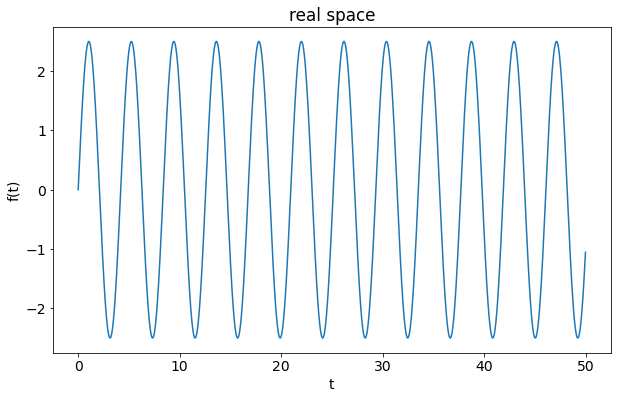

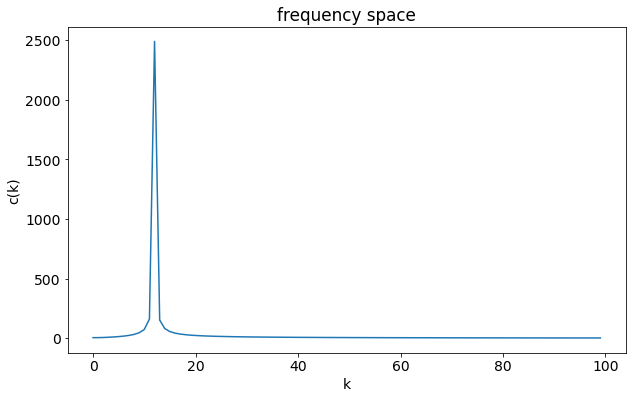

In [5]:
tmax = 50 # seconds
tres = 40 # samples per second
t = np.linspace(0, tmax, tmax*tres, endpoint=False)
y = 2.5 * np.sin(1.5 * t)

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('real space')
plt.show()
# YOUR CODE HERE
ck = abs(np.fft.rfft(y))
plt.plot(ck[0:100])
plt.xlabel('k')
plt.ylabel('c(k)')
plt.title('frequency space')
plt.show()

To recover the coefficient inside the sine function, multiply $k$ (which goes from 0 to N//2+1) by ($2\pi$/`tmax`). This is sometimes referred to as wavenumber. Try plotting the FFT vs. wavenumber to see the peak line up with the coefficient in the function.

To plot against frequency, use the [np.fft.rfftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html) function to create the array of frequencies for a sample of size $N$ and a sample spacing of `1/tres`. Try plotting the FFT again as a function of frequency. Notice that the maximum frequency is half the sampling rate, also known as the [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency).

To recover the amplitude of the frequency, multiply |$c_{k}$| by $2/N$. The factor of 2 comes from the fact that the real FFT is only half of the full FFT. The values, $c_{k} / N$, are often referred to as $\gamma_k$.

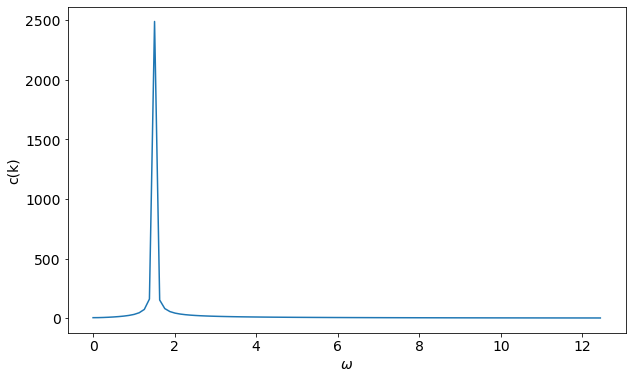

In [6]:
# YOUR CODE HERE
omega = 2*np.pi/tmax * np.arange(0,int(len(y)//2+1))
plt.plot(omega[0:100],ck[0:100])
plt.xlabel('$\omega$')
plt.ylabel('c(k)')
plt.show()

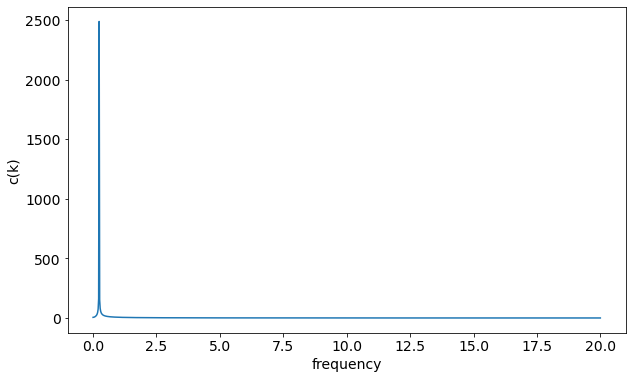

In [7]:
freqs = np.fft.rfftfreq(int(len(y)), d=1/tres)
plt.plot(freqs,ck)
plt.xlabel('frequency')
plt.ylabel('c(k)')
plt.show()

### Inverse DFT

The inverse of the DFT is given by

$
\begin{align}
\large
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp \left(i \frac{2 \pi k n}{N} \right)
\end{align}
$

Since a signal of $N$ points gives us $N$ Fourier coefficients, there has been no loss of information. Therefore, if we take the inverse FFT of the coefficients we computed earlier. We should recover the original signal exactly. Use the [np.fft.irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html) to do a real inverse FFT and plot the recreated signal below. Overplot the original to assure yourself.

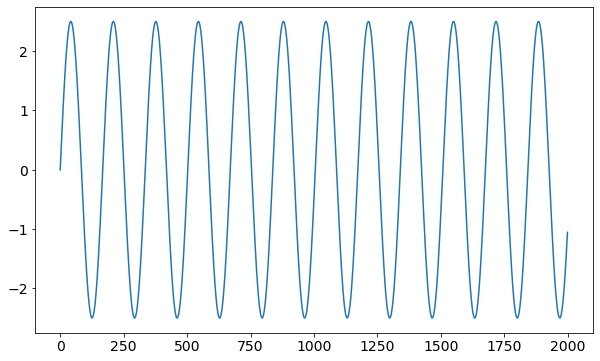

In [8]:
ck = np.fft.rfft(y)
plt.plot(np.fft.irfft(ck))

### Physical interpretation of the Fourier transform

Now it should be becoming apparent that if we have a signal represented by a single sine wave, the Fourier transform of that signal gives us its frequency. If the signal was music, the DFT would give us the notes.

Let's confirm this by creating a new signal of three sine waves. Plot the signal below, then compute its DFT and plot that as well.

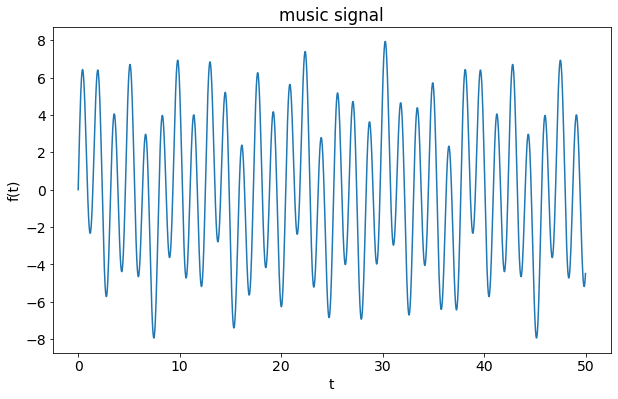

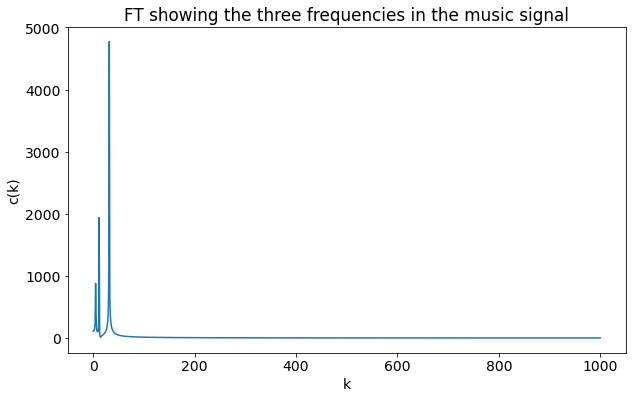

In [9]:
tmax = 50 # seconds
tres = 40 # samples per second
t = np.linspace(0, tmax, tmax*tres, endpoint=False)
y = 2 * np.sin(1.5 * t) + 5 * np.sin(4 * t) + np.sin(2 * t / 3)
# YOUR CODE HERE
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('music signal')
plt.show()
ck = abs(np.fft.rfft(y))
plt.plot(ck)
plt.xlabel('k')
plt.ylabel('c(k)')
plt.title('FT showing the three frequencies in the music signal')
plt.show()

### Signal Filtering

With the signal transformed into frequency space, we can modify it to remove or add components at various frequencies before transforming it back to real space. Imagine the highest frequency peak (wavenumber = 4) is unwanted noise. Set all $c_{k}$ values within 1.0 of the peak to zero and then plot the resulting signal in real space.

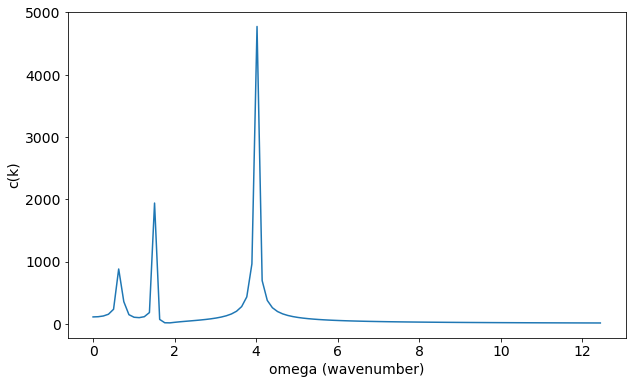

In [10]:
wn = 2*np.pi/tmax * np.arange(0,int(len(y)//2+1))
plt.plot(wn[:100],ck[:100])
plt.xlabel('omega (wavenumber)')
plt.ylabel('c(k)')
plt.show()

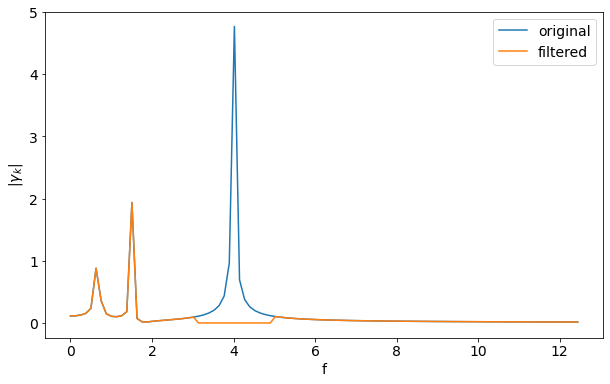

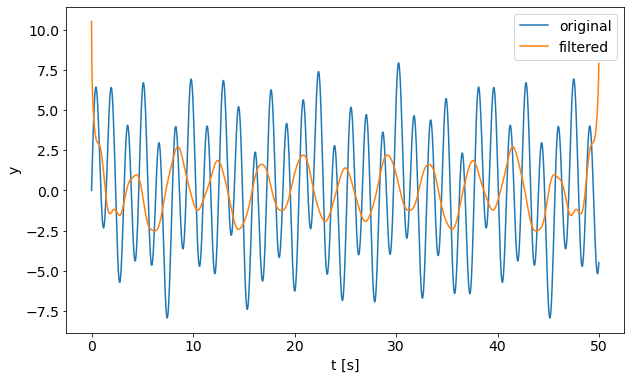

In [240]:
# find the position of the peak
center = np.abs(ck).argmax()
# identify the section of the array within 0.2 of the peak frequency
region = np.abs(wn - wn[center]) < 1
cknew = ck.copy()
cknew[region] = 0

plt.plot(wn[:100], abs(ck)[:100]/ck.size, label="original")
plt.plot(wn[:100], abs(cknew)[:100]/ck.size, label="filtered")
plt.xlabel('f')
plt.ylabel('|$\gamma_{k}$|')
plt.legend()
plt.show()

ynew = np.fft.irfft(cknew)
plt.figure()
plt.plot(t, y, label="original")
plt.plot(t, ynew, label="filtered")
plt.xlabel('t [s]')
plt.ylabel('y')
plt.legend()
plt.show()

Now let's add some white noise to a signal. See if you can clean it up by filtering out signal outside of the peak frequencies.

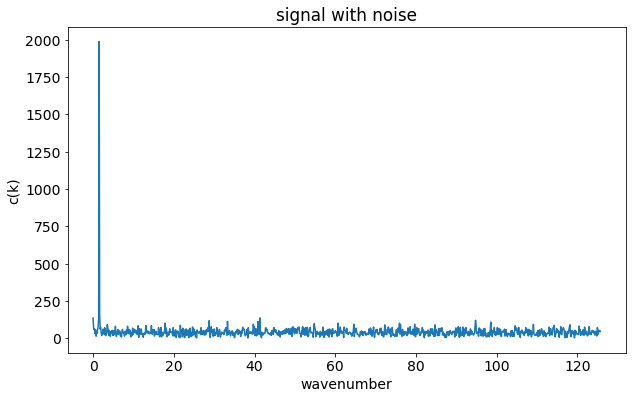

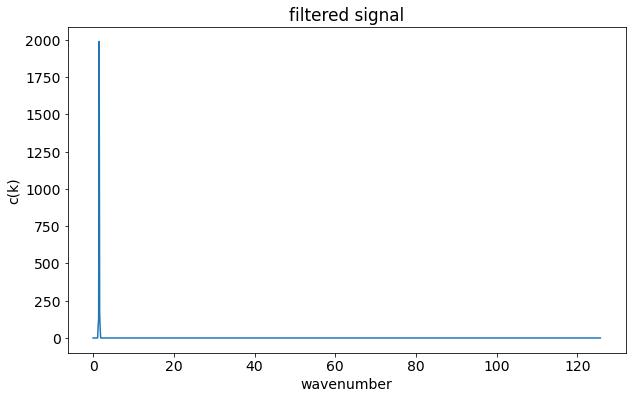

In [256]:
tmax = 50
tres = 40
t = np.linspace(0, tmax, tmax*tres, endpoint=False)
y = 2 * np.sin(1.5 * t) + np.random.normal(0, 1, t.size)

# YOUR CODE HERE
ck = abs(np.fft.rfft(y))
wn = 2*np.pi/tmax * np.arange(0,int(len(y)//2+1))
plt.plot(wn,ck)
plt.xlabel('wavenumber')
plt.ylabel('c(k)')
plt.title('signal with noise')
plt.show()
# find the position of the peak
center = np.abs(ck).argmax()
# identify the section of the array within 0.2 of the peak frequency
region = np.abs(wn - wn[center]) < 0.3
cknew = ck.copy()
cknew[region] = 0
plt.plot(wn,(ck-cknew))
plt.xlabel('wavenumber')
plt.ylabel('c(k)')
plt.title('filtered signal')
plt.show()

### Obtaining Phase Information

We have seen that Fourier transform of a sine wave will give us the frequency of the wave. We have also seen that a signal can be fully reproduced from its Fourier coefficients. Two sine waves with the same frequency should have the same amplitude spectrum, yet should both be reproducible from their Fourier transforms. How can this be?

In the example below, we will use intervals of integer multiples of $\pi$ to make things clearer.

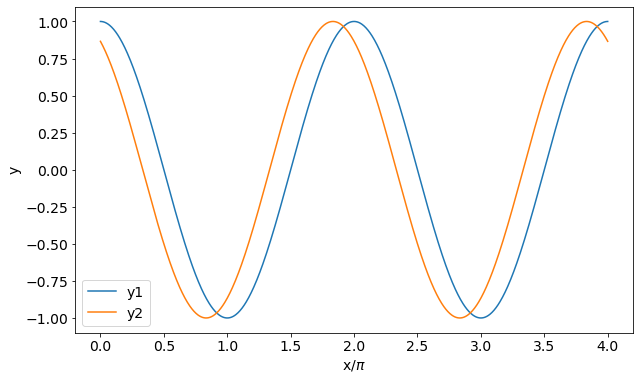

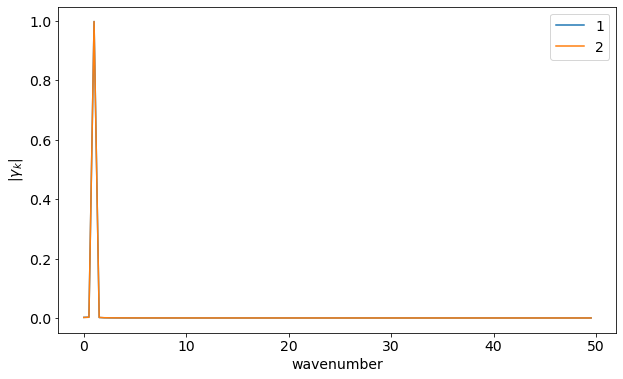

In [257]:
xmax = 4 * np.pi
x = np.linspace(0, xmax, 1000)
y1 = np.cos(x)
y2 = np.cos(x + np.pi/6)

plt.plot(x/np.pi, y1, label='y1')
plt.plot(x/np.pi, y2, label='y2')
plt.xlabel('x/$\pi$')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure()
ck1 = np.fft.rfft(y1)
ck2 = np.fft.rfft(y2)
k = 2 * np.pi * np.arange(0, ck.size) / xmax
plt.plot(k[:100], abs(ck1[:100])/ck1.size, label='1')
plt.plot(k[:100], abs(ck2[:100])/ck1.size, label='2')
plt.xlabel('wavenumber')
plt.ylabel('$|\gamma_k|$')
plt.legend()
plt.show()

Indeed, they have the same amplitude spectrum, but if you plot the real and imaginary parts separate, you will see that they are different. The phase information is encoded in the ratio of the real and imaginary parts. The phase angle can be calculated as

$
\begin{equation}
\large
\phi = \tan^{-1} \left( \frac{imag(c_k)}{real(c_k)} \right)
\end{equation}
$

However, one must take care when using this formula to compute phase. First, the values where the Fourier coefficients are very small will be mostly meaningless. Since there is almost no signal, the angles computed will reflect the ratios of two very small numbers that are mostly just rounding error. Second, the [np.arctan](https://numpy.org/doc/stable/reference/generated/numpy.arctan.html) function will return angles only in the range [$-\pi/2, \pi/2$]. Instead, one should use either [np.arctan2](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) or more conveniently, the [np.angle](https://numpy.org/doc/stable/reference/generated/numpy.angle.html#numpy.angle) function.

Compute the difference in phase for the above two signals. It is sufficient to compute the phase for the largest Fourier coefficient.

In [280]:
# YOUR CODE HERE

In [281]:
print(np.argmax(ck1))
print(np.argmax(ck2))

2
2


In [282]:
phi1 = np.arctan2(np.imag(ck1[2]),np.real(ck1[2]))

In [283]:
phi2 = np.arctan2(np.imag(ck2[2]),np.real(ck2[2]))

In [285]:
phase_diff = abs(phi1-phi2)
phase_diff

0.5231656432351919

### Convolution

[Convolution](https://en.wikipedia.org/wiki/Convolution) is an operation that expresses how two shapes are modified by each other. Given two functions, $f(x)$ and $g(x)$, the convolution $(f * g)(x)$ is given by

$
\begin{align}
\large
(f * g)(x) = \int_{-\infty}^{\infty} f(x') g(x - x') dx'
\end{align}
$

A simple example shows how a square wave is modified by a gaussian.

First, let's generate a square wave.

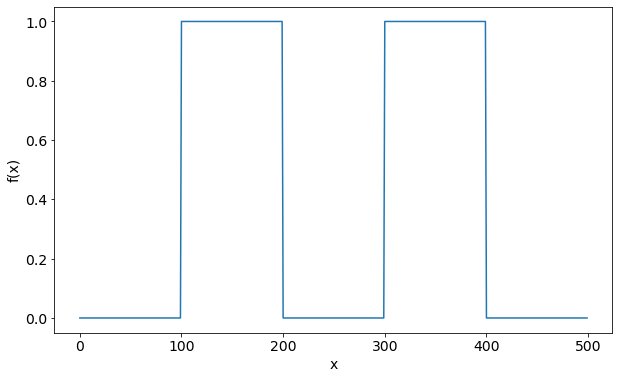

In [286]:
from scipy import signal

sig = np.repeat([0., 1., 0., 1., 0.], 100)

plt.plot(sig)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Imagine $x$ represents the pixels on a digital camera and $f(x)$ represents light entering the camera. It's bright where $f(x)$ = 1 and dark where $f(x)$ = 0. Instead of the image being perfectly detected, imagine the light hitting a single pixel is spread out over neighboring pixels. The function representing how light is spread out, $g(x)$, is often called the Point Spread Function (PSF).

If the PSF is a Gaussian, for example, then $g(x)$ looks like the plot below.

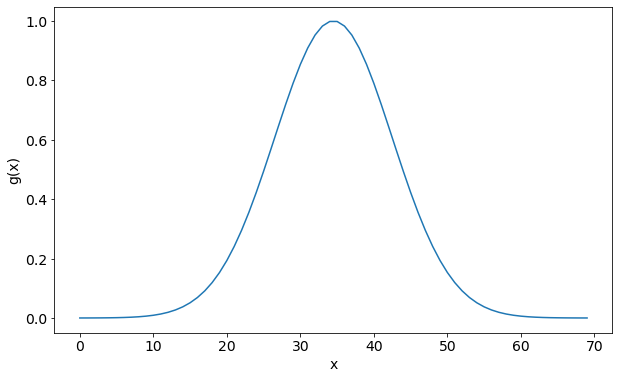

In [287]:
psf = signal.windows.gaussian(70, 8)
plt.plot(psf)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

The incoming signal as it's recorded by the camera will be the convolution of $f(x)$ and $g(x)$. We will use the [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) function to compute it.

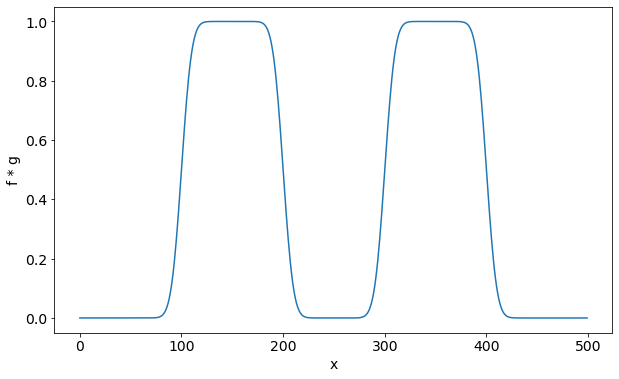

In [288]:
filtered = signal.fftconvolve(sig, psf, mode='same') / sum(psf)
plt.plot(filtered)
plt.xlabel('x')
plt.ylabel('f * g')
plt.show()

The [scipy.signal.windows](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) module has a number of different window functions. Instead of a Gaussian, try for example, convolving the original signal with a [flat top](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.flattop.html#scipy.signal.windows.flattop) window. Some plotting code has been provided to help display things neatly.

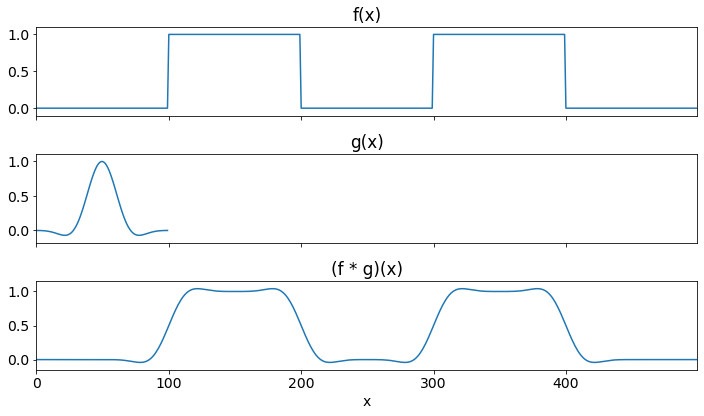

In [295]:
# YOUR CODE HERE
psf = signal.windows.flattop(100, sym=True)

filtered = signal.fftconvolve(sig, psf, mode='same') / sum(psf)


fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('f(x)')
ax_orig.margins(0, 0.1)
ax_win.plot(psf)
ax_win.set_title('g(x)')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('(f * g)(x)')
ax_filt.margins(0, 0.1)
ax_filt.xaxis.set_label_text('x')
fig.tight_layout()
plt.show()

### Convolution with FFTs

The process of convolving two functions (or signals, arrays, etc.) will become very computational expensive as the sizes of those signals increase. One must take each point in $f(x)$ and spread it out to all other points according to $g(x)$. In 2D, this would be even worse. However, it can be shown mathematically that the convolution of two signals can be done by simply multiplying them together in Fourier space, then returning to real space with an inverse Fourier transform.

Let's demonstrate this by blurring a photograph with a Gaussian PSF using 2D FFTs. First, we'll use a stock photograph stored in the SciPy library.

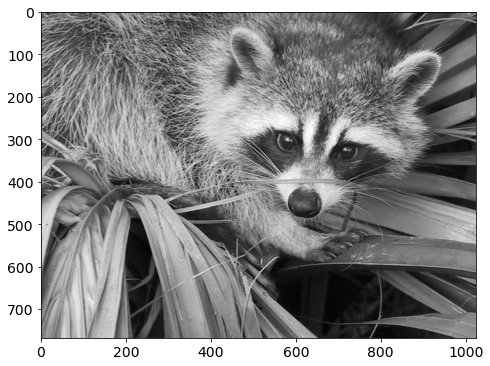

(768, 1024)

In [306]:
from scipy import misc

face = misc.face(gray=True)
plt.imshow(face, cmap="gray")
plt.show()
face.shape

Now use the the [np.fft.rfft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html) function to perform a 2D FFT of the image. Compare the shape of the image array to the FFT array. If the image has $NxM$ pixels, the array of Fourier coefficients should have shape ($N, M//2+1$).

In [309]:
# YOUR CODE HERE
(np.fft.rfft2(face, s=None, axes=(- 2, - 1))).shape

(768, 513)

### Creating a PSF

In order to do this manually, the FFT of the PSF must be the same shape as the FFT of the image. SciPy's signal processing is more flexible than this.

Let's start by creating a grid of x and y positions with the shape of the image.

In [310]:
x, y = np.mgrid[0:face.shape[0], 0:face.shape[1]]

Now, create a 2D Gaussian where the value of $\sigma$ controls the degree of blurring. We use the [np.roll](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) function to shift the Gaussian to the origin. Feel free to comment those lines out to see how it affects things.

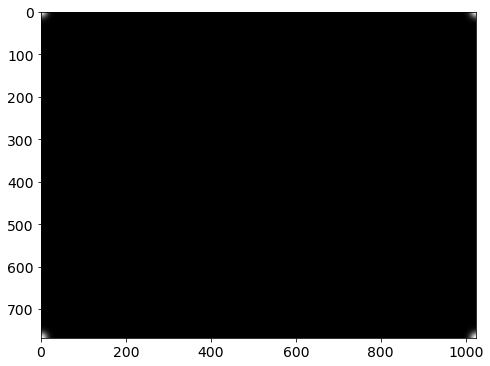

In [329]:
sigma = 10
cx = face.shape[0] // 2
cy = face.shape[1] // 2
psf = np.exp(-((x-cx)**2 + (y-cy)**2) / (2*sigma**2))
psf = np.roll(psf, psf.shape[0]//2, axis=0)
psf = np.roll(psf, psf.shape[1]//2, axis=1)
plt.imshow(psf, cmap='gray')
plt.show()

Now, take the 2D FFT of the PSF. It should be the same shape as the 2D FFT of the image.

In [330]:
# YOUR CODE HERE
np.fft.rfft2(psf).shape

(768, 513)

Finally, multiply the two FFT arrays together and use [np.fft.irfft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html) to take the inverse 2D FFT. Plot the result.

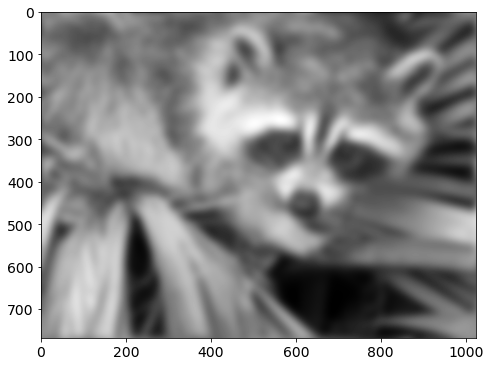

In [331]:
# YOUR CODE HERE
multiplied_ffts = np.fft.rfft2(psf) * np.fft.rfft2(face)
reconstructed_img = np.fft.irfft2(multiplied_ffts)
plt.imshow(reconstructed_img,cmap = 'gray')
plt.show()

### Challenge: Deconvolution

Can you reverse the process to unblur the image? This is known as deconvolution. It only requires the inverse arithmetic with the FFT arrays. However, since you are doing division instead of multiplication, care must be taken when the values in the denominator are very small. To get the FFT of the unblurred image, only do the division for values of the PSF FFT that are greater than some threshold value, say 1e-3. For values below that, simply use the values from the numerator by themselves.

In [385]:
# formula
#fft(b) = fft(orig) * fft(psf)
#fft(orig) = fft(b)/fft(psf)
#invfft(fft(orig))= invfft ( fft(b)/fft(psf) )

In [365]:
fft_psf = np.fft.rfft2(psf)
fft_blur = np.fft.rfft2(reconstructed_img)

In [399]:
good = fft_pst>1e-3
good

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [400]:
fft_psf[good]

array([6.28318531e+02+0.00000000e+00j, 6.27136848e+02-4.02163528e-15j,
       6.23605116e+02-8.04841522e-15j, ...,
       1.99307010e-03+2.83256731e-15j, 1.46092150e-03+4.83786851e-16j,
       1.06683213e-03-1.70140353e-15j])

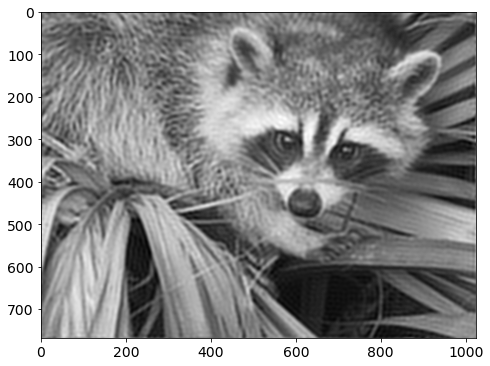

In [404]:
ft_unblurred = np.zeros_like(fft_blur)

ft_unblurred[good] = fft_blur[good]/fft_psf[good]
ft_unblurred[~good] = fft_blur[~good]

new_img = np.fft.irfft2(ft_unblurred)

plt.imshow(new_img,cmap='gray')